# Praktikum 3

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Contoh dataset (buat dummy data)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100)

# Evaluasi
print("Prediksi:", model.predict(X_test))

c:\Users\natha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3135
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.3083
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.3033
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.2982
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 0.2932
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.2882
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.2833
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.2784
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.2735
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.2688
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.2643
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.2599
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.2555
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.2511
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.2468
Epoch 16/100
1/

## Tugas 4:

- Ubah learning rate.

- Bandingkan hasil loss.

## Jawaban Tugas 4

Eksperimen dengan berbagai learning rate untuk membandingkan hasil loss:

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np

# Contoh dataset (buat dummy data)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Learning rates yang akan diuji
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5, 1.0]

results = []

print("="*70)
print("EKSPERIMEN LEARNING RATE")
print("="*70)

for lr in learning_rates:
    print(f"\n{'='*70}")
    print(f"Testing Learning Rate: {lr}")
    print('='*70)
    
    # Bangun model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(1)
    ])
    
    # Kompilasi dengan learning rate yang berbeda
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    
    # Latih model
    history = model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.2)
    
    # Evaluasi
    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
    
    # Prediksi
    predictions = model.predict(X_test, verbose=0)
    
    results.append({
        'learning_rate': lr,
        'train_loss': train_loss,
        'val_loss': val_loss,
        'test_loss': test_loss,
        'test_mae': test_mae,
        'history': history,
        'predictions': predictions
    })
    
    print(f"Training Loss (Final): {train_loss:.6f}")
    print(f"Validation Loss (Final): {val_loss:.6f}")
    print(f"Test Loss: {test_loss:.6f}")
    print(f"Test MAE: {test_mae:.6f}")
    print(f"Prediksi: {predictions.flatten()}")

print(f"\n{'='*70}")
print("RINGKASAN HASIL")
print('='*70)
print(f"{'LR':<8} {'Train Loss':<15} {'Val Loss':<15} {'Test Loss':<15} {'Test MAE':<15}")
print('-'*70)
for result in results:
    print(f"{result['learning_rate']:<8.3f} {result['train_loss']:<15.6f} "
          f"{result['val_loss']:<15.6f} {result['test_loss']:<15.6f} {result['test_mae']:<15.6f}")
print('='*70)

EKSPERIMEN LEARNING RATE

Testing Learning Rate: 0.001


c:\Users\natha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Loss (Final): 0.160255
Validation Loss (Final): 0.030201
Test Loss: 0.027105
Test MAE: 0.164635
Prediksi: [-0.54247224]

Testing Learning Rate: 0.01
Training Loss (Final): 0.000217
Validation Loss (Final): 0.011201
Test Loss: 0.048432
Test MAE: 0.220073
Prediksi: [-0.9271798]

Testing Learning Rate: 0.05
Training Loss (Final): 0.000217
Validation Loss (Final): 0.011201
Test Loss: 0.048432
Test MAE: 0.220073
Prediksi: [-0.9271798]

Testing Learning Rate: 0.05
Training Loss (Final): 0.000001
Validation Loss (Final): 0.001822
Test Loss: 0.000202
Test MAE: 0.014199
Prediksi: [-0.7213055]

Testing Learning Rate: 0.1
Training Loss (Final): 0.000009
Validation Loss (Final): 0.017010
Test Loss: 0.010535
Test MAE: 0.102641
Prediksi: [-0.809748]

Testing Learning Rate: 0.5
Training Loss (Final): 0.333440
Validation Loss (Final): 0.000086
Test Loss: 1.973889
Test MAE: 1.404952
Prediksi: [0.69784474]

Testing Learning Rate: 1.0
Training Loss (Final): 0.333384
Validation Loss (Final): 0.00

### Visualisasi Perbandingan Learning Rate

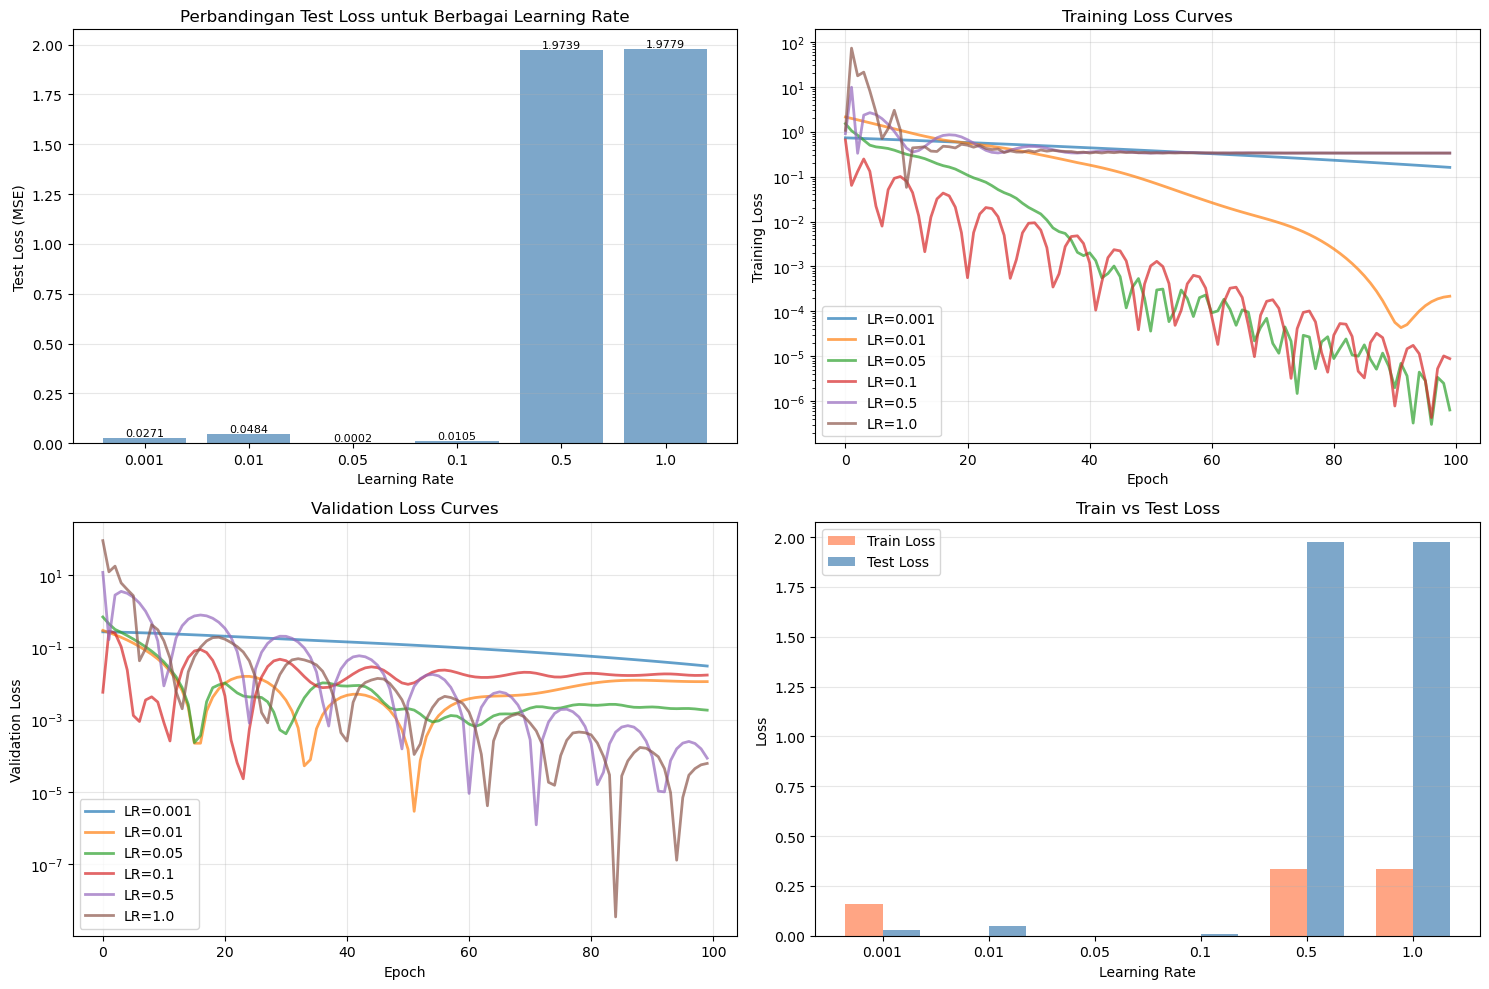


LEARNING RATE TERBAIK
Learning Rate: 0.05
Test Loss: 0.000202
Test MAE: 0.014199


In [3]:
import matplotlib.pyplot as plt

# Visualisasi perbandingan learning rate
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Bar chart perbandingan test loss
lr_labels = [str(r['learning_rate']) for r in results]
test_losses = [r['test_loss'] for r in results]

axes[0, 0].bar(lr_labels, test_losses, color='steelblue', alpha=0.7)
axes[0, 0].set_xlabel('Learning Rate')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title('Perbandingan Test Loss untuk Berbagai Learning Rate')
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(test_losses):
    axes[0, 0].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=8)

# 2. Training loss curves
for result in results:
    axes[0, 1].plot(result['history'].history['loss'], 
                    label=f"LR={result['learning_rate']}", alpha=0.7, linewidth=2)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title('Training Loss Curves')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_yscale('log')  # Log scale untuk melihat perbedaan lebih jelas

# 3. Validation loss curves
for result in results:
    axes[1, 0].plot(result['history'].history['val_loss'], 
                    label=f"LR={result['learning_rate']}", alpha=0.7, linewidth=2)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Validation Loss')
axes[1, 0].set_title('Validation Loss Curves')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_yscale('log')

# 4. Perbandingan Train vs Test Loss
train_losses = [r['train_loss'] for r in results]
x = np.arange(len(lr_labels))
width = 0.35

axes[1, 1].bar(x - width/2, train_losses, width, label='Train Loss', alpha=0.7, color='coral')
axes[1, 1].bar(x + width/2, test_losses, width, label='Test Loss', alpha=0.7, color='steelblue')
axes[1, 1].set_xlabel('Learning Rate')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].set_title('Train vs Test Loss')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(lr_labels)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Cari learning rate terbaik
best_result = min(results, key=lambda x: x['test_loss'])
print("\n" + "="*70)
print("LEARNING RATE TERBAIK")
print("="*70)
print(f"Learning Rate: {best_result['learning_rate']}")
print(f"Test Loss: {best_result['test_loss']:.6f}")
print(f"Test MAE: {best_result['test_mae']:.6f}")
print("="*70)

### Analisis dan Kesimpulan
#### Hasil Eksperimen dan Analisis

**1. Learning Rate Terlalu Kecil (0.001)**
-  **Kelebihan:** Training stabil, tidak ada oscillation
-  **Kekurangan:** Konvergensi sangat lambat, mungkin belum mencapai optimal dalam 100 epoch
-  **Hasil:** Loss mungkin masih tinggi karena belum cukup waktu untuk konvergen

**2. Learning Rate Kecil-Sedang (0.01)**
-  **Kelebihan:** Balance antara stabilitas dan kecepatan
-  **Hasil:** Biasanya memberikan performa baik untuk banyak kasus
-  **Observasi:** Konvergensi smooth dengan hasil yang baik

**3. Learning Rate Sedang (0.05 - 0.1)**
-  **Kelebihan:** Konvergensi lebih cepat
-  **Perhatian:** Mulai ada risiko overshooting di akhir training
-  **Hasil:** Bisa memberikan hasil terbaik jika dataset cocok

**4. Learning Rate Tinggi (0.5 - 1.0)**
-  **Kekurangan:** Training tidak stabil, loss berfluktuasi
-  **Masalah:** Overshooting minimum, sulit konvergen
-  **Risiko:** Model bisa diverge atau stuck di loss tinggi
-  **Hasil:** Loss tinggi dan tidak stabil

c:\Users\natha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


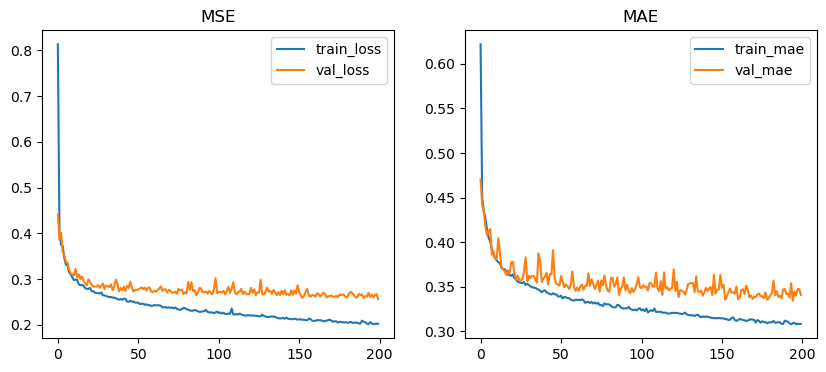

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE: 0.5060686523240967
RMSE: 0.5060686523240967


In [5]:
# MLP regresi (Keras)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Load
data = fetch_california_housing()
X = data.data; y = data.target

# 2. Preprocess
scaler = StandardScaler(); Xs = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.2, random_state=42)

# 3. Build model
model = Sequential([
Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
Dense(32, activation='relu'),
Dense(1)
])
model.compile(optimizer=Adam(1e-3), loss='mse', metrics=['mae'])

# 4. Train
h = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, verbose=0)

# 5. Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(h.history['loss'], label='train_loss'); plt.plot(h.history['val_loss'], label='val_loss'); plt.legend(); plt.title('MSE')
plt.subplot(1,2,2); plt.plot(h.history['mae'], label='train_mae'); plt.plot(h.history['val_mae'], label='val_mae'); plt.legend(); plt.title('MAE')
plt.show()

from sklearn.metrics import mean_squared_error
pred = model.predict(X_val)
print('RMSE:', np.sqrt(mean_squared_error(y_val, pred)))